In [3]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

## Load Ngrams

In [4]:
def city_ngrams(inputdir, city_name, target_list):
    """ Get a dataframe with the target list of ngrams
    """
    comments_loc = Path(inputdir)
    date2rank = {}
    for file in sorted(comments_loc.glob(f'{city_name}*/*')):
        print(file,end='\r')
        temp_df = pd.read_csv(file,sep='\t')
        temp_df.Ngram = temp_df.Ngram.astype(str)
        temp_df['Date'] = file.stem
        #date2rank.update({file.stem:temp_df[temp_df['Ngram'].str.contains(target)]})
        date2rank.update({file.stem:temp_df[temp_df['Ngram'].isin(target_list)]})
    new_res = pd.concat(date2rank.values())
    sm_df = new_res.pivot(index='Date', columns='Ngram',values='rank')
    sm_df.index = pd.to_datetime(sm_df.index)
    return sm_df

In [5]:
topn_1grams = ['virus','coronavirus','covid19','masks','pandemic','quarantine','symptoms','flu','distancing','lockdown','testing','n95','hospitals']

In [4]:
sm_df = city_ngrams('../data/reddit_data_0418/ngrams/2grams/', 'Boston', ['social distancing', 'from home', 'the lockdown'])

/home/hereford/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


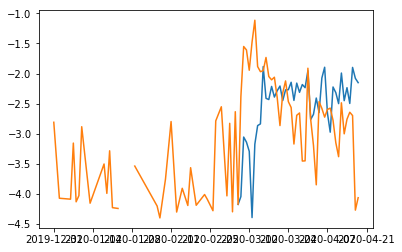

In [5]:
plt.plot(sm_df.index.values ,np.log10(sm_df['social distancing'])*-1)
plt.plot(sm_df.index.values ,np.log10(sm_df['from home'])*-1)


In [6]:
sm_df = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', ['quarantine', 'virus', 'wfh'])

In [11]:
sm_df.iloc[:,0]

Date
2020-01-12      NaN
2020-01-14      NaN
2020-01-15      NaN
2020-01-21      NaN
2020-01-23      NaN
              ...  
2020-04-14    346.5
2020-04-15    507.5
2020-04-16    506.0
2020-04-17    611.0
2020-04-18    558.5
Name: quarantine, Length: 88, dtype: float64

(array([737435., 737449., 737463., 737477., 737491., 737505., 737519.,
        737533.]), <a list of 8 Text xticklabel objects>)

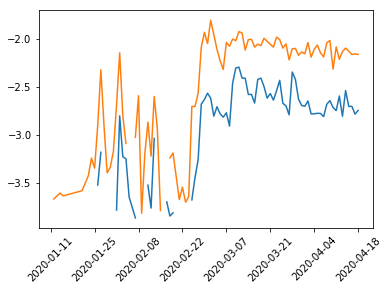

In [15]:
plt.plot(sm_df.index.values ,np.log10(sm_df.iloc[:,0])*-1)
plt.plot(sm_df.index.values ,np.log10(sm_df.iloc[:,1])*-1)
plt.xticks(rotation=45)

In [6]:
targets_1grams = ['virus','coronavirus', 'corona', 'pandemic', 'quarantine', 'Corona', 'Virus', 'Wuhan', 'flu', 'outbreak', 'sanitizer','infected']

In [7]:
sm_1grams = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', targets_1grams)

In [8]:
sm_1grams.shape

(96, 12)

/Users/joshuaminot/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


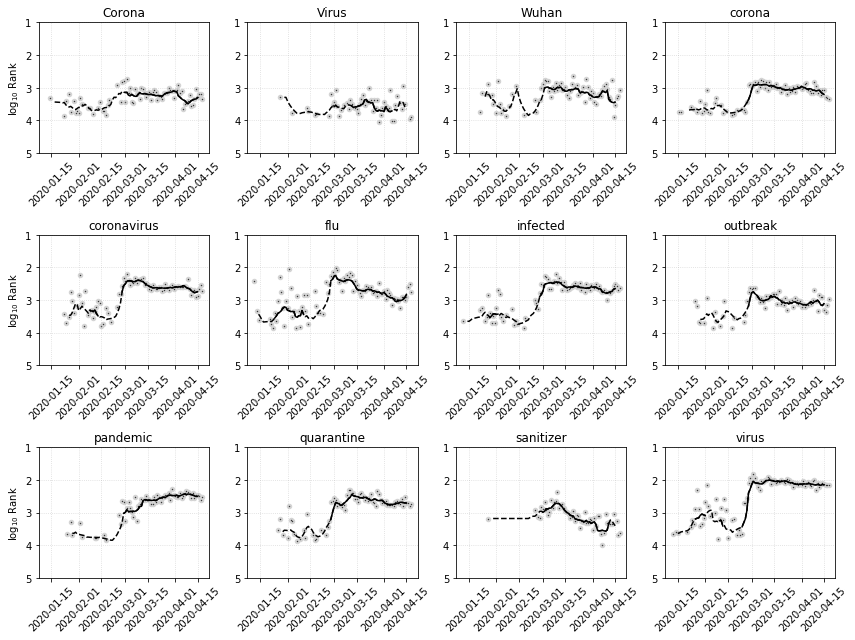

In [9]:
f,a = plt.subplots(3,4,figsize=(12,9))

a = a.ravel()

for i,col in enumerate(sm_1grams.columns):
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='o',color='lightgrey',s=20)
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='.',color='k',s=.5)
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].fillna(method='pad').rolling(7,center=True).mean())*-1,color='k',linestyle='--')
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].rolling(7,center=True).mean())*-1,color='k',linestyle='-')
    a[i].tick_params(axis='x', rotation=45)
    a[i].set_xlim(sm_1grams.index.min()-timedelta(days=4),sm_1grams.index.max()+timedelta(days=4))
    a[i].set_ylim(-5,-1)
    a[i].set_title(col)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_yticklabels(labels = np.arange(1,6)[::-1])
    if i in (0,4,8): a[i].set_ylabel('log$_{10}$ Rank')
f.tight_layout()

In [10]:
targets_1grams = ['nurses', 'isolation', 'patients', 'doctors', 'hospitals', 'curve','asymptomatic','health','equipment','symptoms','distancing','lockdown']

In [11]:
len(targets_1grams)

12

In [12]:
sm_1grams = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', targets_1grams)

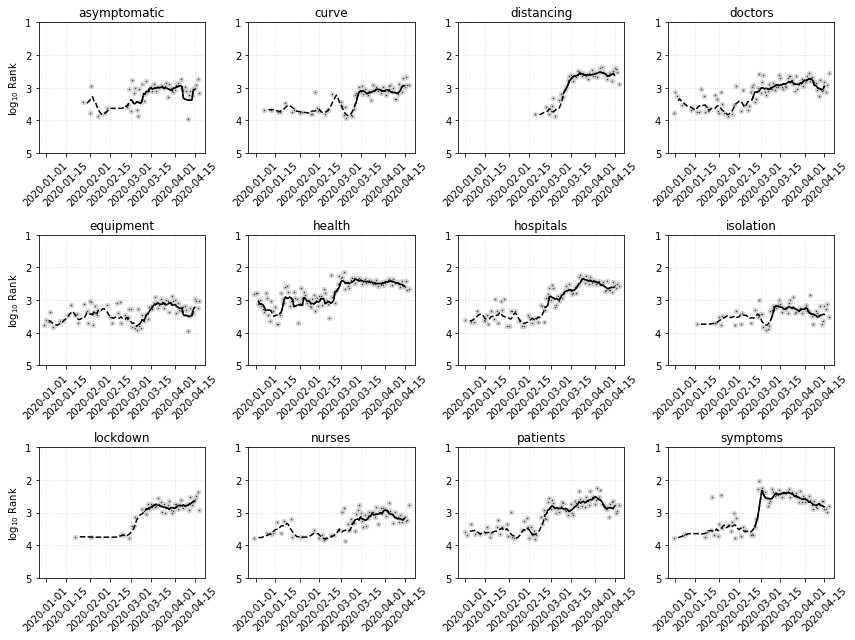

In [13]:
f,a = plt.subplots(3,4,figsize=(12,9))

a = a.ravel()

for i,col in enumerate(sm_1grams.columns):
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='o',color='lightgrey',s=20)
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='.',color='k',s=.5)
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].fillna(method='pad').rolling(7,center=True).mean())*-1,color='k',linestyle='--')
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].rolling(7,center=True).mean())*-1,color='k',linestyle='-')
    a[i].tick_params(axis='x', rotation=45)
    a[i].set_xlim(sm_1grams.index.min()-timedelta(days=4),sm_1grams.index.max()+timedelta(days=4))
    a[i].set_title(col)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_ylim(-5,-1)
    a[i].set_yticklabels(labels = np.arange(1,6)[::-1])
    if i in (0,4,8): a[i].set_ylabel('log$_{10}$ Rank')
f.tight_layout()

## Apple Mobility Data

In [15]:
apple_mob_dat = pd.read_csv('../data/mobility_data/applemobilitytrends-2020-05-02.csv')

In [16]:
apple_mob_dat

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,sub-region,Île-de-France Region,driving,NaN,100.0,102.06,103.61,110.01,107.47,113.34,...,20.81,19.81,17.59,17.29,20.81,25.32,23.99,23.14,19.34,21.01
1154,sub-region,Örebro County,driving,Örebro län,100.0,101.70,105.33,108.03,115.57,123.96,...,107.07,120.65,116.40,114.68,103.28,107.91,109.64,127.04,115.35,122.53
1155,sub-region,Östergötland County,driving,NaN,100.0,96.87,98.81,103.48,109.64,113.50,...,106.38,114.71,117.23,108.38,106.47,102.50,110.64,126.09,106.03,112.27
1156,sub-region,Ústí nad Labem Region,driving,Ústecký kraj,100.0,101.57,107.63,112.87,120.32,126.19,...,108.22,107.30,107.54,119.49,105.89,107.77,101.99,101.86,119.88,107.27


In [77]:
available= ['New York City', 'Los Angeles', 'Boston', 'Chicago', 'Atlanta']
reddit_targets = ['NYC', 'LosAngeles', 'Portland', 'Chicago', 'Austin']

In [78]:
apple2reddit = {'NYC':'New York City',
                'LosAngeles':'Los Angeles',
                'Portland':'Portland',
                'Chicago':'Chicago',
                'Austin':'Austin'}

In [80]:
top5 = apple_mob_dat[apple_mob_dat.region.isin(apple2reddit.values())]

In [81]:
top5= top5.set_index(['region','transportation_type']).T

In [82]:
top5.drop('geo_type',inplace=True)

In [83]:
top5.drop('alternative_name',axis=0,inplace=True)

In [84]:
top5.head()

region               Austin                 Chicago                  \
transportation_type driving transit walking driving transit walking   
2020-01-13              100     100     100     100     100     100   
2020-01-14            99.17  105.32  101.52  103.68  100.93  104.58   
2020-01-15           103.96  107.85  105.54  104.45  100.61   107.2   
2020-01-16           105.19  105.53  107.57  108.72  103.79  104.82   
2020-01-17           119.18  108.08  146.21   132.8  120.72  128.05   

region              Los Angeles                 New York City                  \
transportation_type     driving transit walking       driving transit walking   
2020-01-13                  100     100     100           100     100     100   
2020-01-14               105.93  103.78  105.72        101.51   92.66   96.09   
2020-01-15               112.23  105.28  111.35        104.51   95.29  105.77   
2020-01-16               111.73  103.12  111.68        108.78   96.42  101.73   
2020-01-17                130.2  109.34  134.45        122.44   107.5  117.09   

region              Portland                  
transportation_type  driving transit walking  
2020-01-13               100     100     100  
2020-01-14             99.29  101.62  101.27  
2020-01-15            102.32   99.97  100.41  
2020-01-16            106.77  103.54  111.63  
2020-01-17            122.19  112.05  135.48

## City Activity

In [67]:
data_dir = Path('../data/reddit_data_0418/cities/')

In [75]:
city2activity = {}
for file in data_dir.glob('*/*comments*'):
    if not any([x in str(file) for x in reddit_targets]): continue
    temp_df = pd.read_csv(file)
    temp_df.created_utc = pd.to_datetime(temp_df.created_utc, unit='s').dt.date
    city2activity.update({file.stem.split('_')[0]:temp_df})
    #break

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

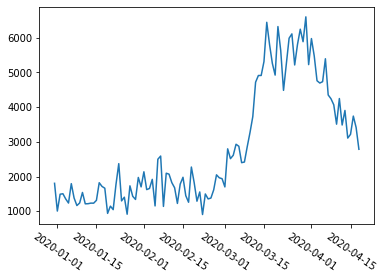

In [93]:
this_city = 'NYC'
temp_df = city2activity[this_city]
plt.plot(temp_df.created_utc.value_counts().sort_index())
plt.xticks(rotation=-35)

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

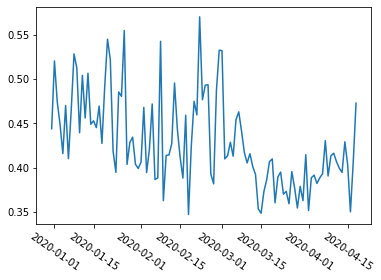

In [100]:
plt.plot(temp_df.groupby(['created_utc'])['author'].nunique().sort_index()/temp_df.created_utc.value_counts().sort_index())
plt.xticks(rotation=-35)

In [95]:
temp_df['post_len'] = temp_df.apply(lambda x: len(str(x['body'])),axis=1)

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

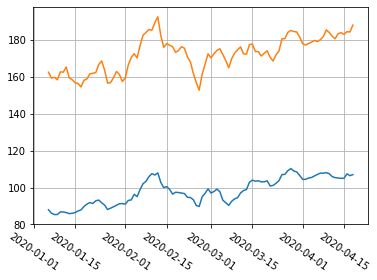

In [103]:
plt.plot(temp_df.groupby('created_utc')['post_len'].quantile(.5).rolling(7).mean())
plt.plot(temp_df.groupby('created_utc')['post_len'].mean().rolling(7).mean())
plt.grid()
plt.xticks(rotation=-35)